# 4. Application of Trained Model to Predicting for Open Loans

### 4.1 Creating df_open_new

Inspect df_open and df_closed from parquet files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# open df_open from parquet file
pd.set_option('display.max_columns', None)
df_open = pd.read_parquet("df_open.parquet")
df_open.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,fico_range_high,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,issue_d_months,earliest_cr_line_months,last_pymnt_d_months,last_credit_pull_d_months,loan_default
0,20225.0,60 months,0.0839,B,9 years,MORTGAGE,44000.0,Not Verified,credit_card,24.52,0.0,729.0,0.0,0.0,7714.0,0.473,34.0,w,3986.42,16238.58,4470.56,0.0,0.0,413.88,609.0,605.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,25.0,35.0,1.0,3.0,4760.0,38.0,16300.0,0.0,6.0,0.0,4.0,14485.0,6086.0,55.9,0.0,0.0,209.0,130.0,8.0,8.0,3.0,8.0,20.0,0.0,2.0,3.0,14.0,10.0,4.0,21.0,2.0,8.0,0.0,0.0,0.0,1.0,97.0,66.7,0.0,0.0,162033.0,13800.0,55515.0,N,N,54,266,4.0,4.0,0
1,17600.0,60 months,0.0999,B,10+ years,MORTGAGE,60000.0,Not Verified,credit_card,25.56,1.0,699.0,0.0,0.0,42738.0,0.870,20.0,w,1102.53,16497.47,4793.58,0.0,0.0,373.87,709.0,705.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49100.0,NaN,NaN,NaN,2.0,18924.0,6178.0,87.2,0.0,0.0,161.0,184.0,18.0,17.0,4.0,18.0,17.0,0.0,5.0,5.0,5.0,5.0,6.0,11.0,6.0,9.0,0.0,0.0,1.0,0.0,88.9,80.0,0.0,0.0,190800.0,48100.0,23569.0,N,N,61,248,4.0,4.0,0
2,20000.0,60 months,0.1446,C,3 years,RENT,75000.0,Not Verified,credit_card,18.64,1.0,669.0,0.0,0.0,35435.0,0.760,25.0,w,4816.35,15183.65,7892.56,0.0,0.0,470.15,709.0,705.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,39.0,43.0,1.0,4.0,14622.0,67.0,46600.0,0.0,2.0,1.0,4.0,3054.0,9116.0,79.1,0.0,0.0,120.0,215.0,8.0,8.0,0.0,14.0,8.0,0.0,6.0,9.0,17.0,4.0,12.0,21.0,7.0,15.0,0.0,0.0,0.0,1.0,96.0,62.5,0.0,0.0,63728.0,43700.0,17128.0,N,N,53,271,4.0,4.0,0
3,12000.0,60 months,0.1559,C,10+ years,MORTGAGE,130000.0,Not Verified,debt_consolidation,24.93,0.0,719.0,0.0,0.0,2392.0,0.212,37.0,w,3680.26,8319.74,5025.49,0.0,0.0,289.21,649.0,645.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,8.0,NaN,1.0,1.0,0.0,21.0,11300.0,1.0,0.0,2.0,2.0,52903.0,NaN,NaN,0.0,0.0,163.0,190.0,2.0,2.0,2.0,NaN,8.0,0.0,0.0,0.0,10.0,14.0,5.0,21.0,3.0,9.0,0.0,0.0,0.0,2.0,97.3,NaN,0.0,0.0,514188.0,0.0,193288.0,N,N,50,243,4.0,4.0,0
4,30000.0,60 months,0.1049,B,3 years,MORTGAGE,83650.0,Source Verified,credit_card,22.80,0.0,724.0,0.0,0.0,38664.0,0.530,37.0,w,10693.97,19306.03,7752.63,0.0,0.0,644.67,794.0,790.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,19.0,74.0,2.0,2.0,14381.0,61.0,73000.0,0.0,0.0,1.0,3.0,13955.0,33195.0,52.0,0.0,0.0,148.0,292.0,1.0,1.0,1.0,1.0,12.0,0.0,8.0,9.0,11.0,17.0,11.0,19.0,9.0,14.0,0.0,0.0,0.0,2.0,97.3,22.2,0.0,0.0,273689.0,69200.0,40689.0,N,N,46,342,4.0,4.0,0


In [2]:
df_open.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476846 entries, 0 to 476845
Data columns (total 83 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   476846 non-null  float64
 1   term                        476846 non-null  object 
 2   int_rate                    476846 non-null  float64
 3   grade                       476846 non-null  object 
 4   emp_length                  440055 non-null  object 
 5   home_ownership              476846 non-null  object 
 6   annual_inc                  476846 non-null  float64
 7   verification_status         476846 non-null  object 
 8   purpose                     476846 non-null  object 
 9   dti                         476036 non-null  float64
 10  delinq_2yrs                 476846 non-null  float64
 11  fico_range_high             476846 non-null  float64
 12  inq_last_6mths              476846 non-null  float64
 13  pub_rec       

Open all pickle files

In [3]:
# Open best_thresholds_closed.pkl file
best_thresholds_closed = pd.read_pickle("df_tuning_results.pkl")
best_thresholds_closed

,Model,Optimized Threshold,TP,FP,FN,TN,Loss Avoided (TP),Missed Revenue (FP),Default Loss (FN),Interest Earned (TN),Risk-Adjusted Return (RAR)
0,Logistic Regression,0.52,39620,80939,23184,166879,5.189541e+08,3.210839e+08,1.906081e+08,2.812097e+08,2.884719e+08
1,Random Forest,0.51,40857,85123,21947,162695,5.241114e+08,3.250475e+08,1.854508e+08,2.772461e+08,2.908592e+08
2,XGBoost,0.50,39112,80356,23692,167462,5.005306e+08,2.948363e+08,2.090316e+08,3.074573e+08,3.041202e+08


In [4]:
# Open best_model_name_new.pkl file
best_model_closed = pd.read_pickle("best_model_name.pkl")
best_model_closed

'XGBoost'

In [5]:
# Open best_threshold_new.pkl file
best_tuned_threshold_closed = pd.read_pickle("best_threshold_new.pkl")
best_tuned_threshold_closed

0.5

In [6]:
# Open models_closed.pkl file
models_closed = pd.read_pickle("models_closed.pkl")
models_closed

{'Logistic Regression': RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='median'))]),
                                                                                ['total_bc_limit',
                                                                                 'acc_open_past_24mths',
                                                                                 'avg_cur_bal',
                                                                                 'fico_range_high',
            

In [7]:
# Open selected_features.pkl file
selected_features = pd.read_pickle("selected_features.pkl")
selected_features

['total_bc_limit',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'fico_range_high',
 'tot_hi_cred_lim',
 'int_rate',
 'mort_acc',
 'home_ownership',
 'open_rv_24m',
 'term',
 'loan_amnt',
 'mo_sin_old_rev_tl_op',
 'grade',
 'dti',
 'bc_open_to_buy']

In [8]:
df_open_new = df_open[selected_features + ["loan_default"]].copy()

df_open_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476846 entries, 0 to 476845
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   total_bc_limit        476846 non-null  float64
 1   acc_open_past_24mths  476846 non-null  float64
 2   avg_cur_bal           476814 non-null  float64
 3   fico_range_high       476846 non-null  float64
 4   tot_hi_cred_lim       476846 non-null  float64
 5   int_rate              476846 non-null  float64
 6   mort_acc              476846 non-null  float64
 7   home_ownership        476846 non-null  object 
 8   open_rv_24m           459909 non-null  float64
 9   term                  476846 non-null  object 
 10  loan_amnt             476846 non-null  float64
 11  mo_sin_old_rev_tl_op  476846 non-null  float64
 12  grade                 476846 non-null  object 
 13  dti                   476036 non-null  float64
 14  bc_open_to_buy        471180 non-null  float64
 15  

Note to self: Check that 'grade' and 'int rate' is in df_open_new

Note to self that in open loans, the 'loan_default' column is different from closed loans, and this df_open_new is unseen data

In [9]:
# Check for missing values
missing_values = df_open_new.isnull().sum()
missing_values.sort_values(ascending=False, inplace=True)
missing_values = missing_values[missing_values > 0]
missing_values

open_rv_24m       16937
bc_open_to_buy     5666
dti                 810
avg_cur_bal          32
dtype: int64

In [10]:
# Probability of default for open loans
X_open = df_open_new.drop(columns=["loan_default"])

# Use the actual model object from models_closed
model = models_closed[best_model_closed]  # Retrieve the model object of Random Forest
open_proba = model.predict_proba(X_open)[:, 1]

df_open_new["prob_default"] = open_proba

c:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Applying best threshold value from closed-loans scenario to predict default or not (1/0) binary class:

In [11]:
# Apply the threshold from the closed-loans scenario
df_open_new["pred_default"] = (df_open_new["prob_default"] >= float(best_tuned_threshold_closed)).astype(int)

# inspect the first few rows of the dataframe
df_open_new.head()

,total_bc_limit,acc_open_past_24mths,avg_cur_bal,fico_range_high,tot_hi_cred_lim,int_rate,mort_acc,home_ownership,open_rv_24m,term,loan_amnt,mo_sin_old_rev_tl_op,grade,dti,bc_open_to_buy,loan_default,prob_default,pred_default
0,13800.0,4.0,14485.0,729.0,162033.0,0.0839,3.0,MORTGAGE,3.0,60 months,20225.0,130.0,B,24.52,6086.0,0,0.482064,0
1,48100.0,2.0,18924.0,699.0,190800.0,0.0999,4.0,MORTGAGE,NaN,60 months,17600.0,184.0,B,25.56,6178.0,0,0.422137,0
2,43700.0,4.0,3054.0,669.0,63728.0,0.1446,0.0,RENT,4.0,60 months,20000.0,215.0,C,18.64,9116.0,0,0.711542,1
3,0.0,2.0,52903.0,719.0,514188.0,0.1559,2.0,MORTGAGE,1.0,60 months,12000.0,190.0,C,24.93,NaN,0,0.637401,1
4,69200.0,3.0,13955.0,724.0,273689.0,0.1049,1.0,MORTGAGE,2.0,60 months,30000.0,292.0,B,22.80,33195.0,0,0.332221,0


In [12]:
# pred_default value counts
df_open_new["pred_default"].value_counts(normalize=True)

pred_default
0    0.535982
1    0.464018
Name: proportion, dtype: float64

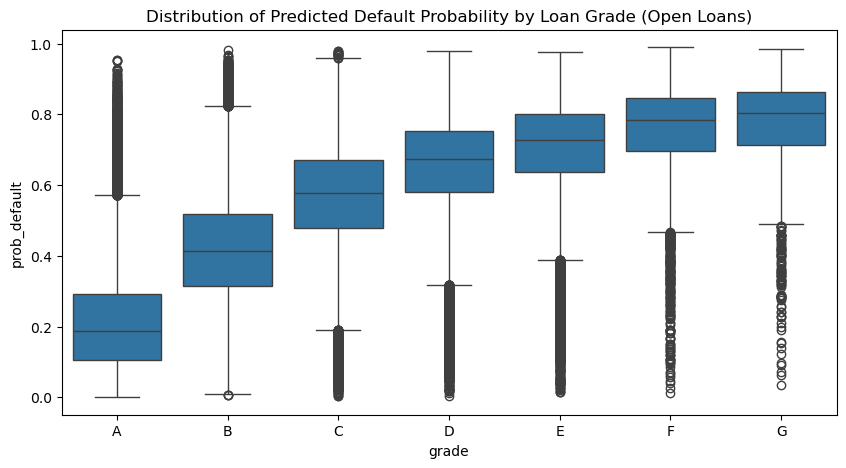

In [13]:
# Visualize distribution of predicted default probabilities by loan grade (if available)
if "grade" in df_open_new.columns:
    plt.figure(figsize=(10,5))
    sorted_grades = sorted(df_open_new["grade"].unique())
    sns.boxplot(data=df_open_new, x="grade", y="prob_default", order=sorted_grades)
    plt.title("Distribution of Predicted Default Probability by Loan Grade (Open Loans)")
    plt.show()

Convert 'term' from categorical to numerical variable for multiplication purposes:

(We did not do in preprocessing to convert to numerical variable as we wanted the 2 values to be a binary representation in 1 variable)

In [14]:
# change 'term' to numerical values
df_open_new["term"] = df_open_new["term"].str.replace(" months", "").astype(int)

In [15]:
df_open_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476846 entries, 0 to 476845
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   total_bc_limit        476846 non-null  float64
 1   acc_open_past_24mths  476846 non-null  float64
 2   avg_cur_bal           476814 non-null  float64
 3   fico_range_high       476846 non-null  float64
 4   tot_hi_cred_lim       476846 non-null  float64
 5   int_rate              476846 non-null  float64
 6   mort_acc              476846 non-null  float64
 7   home_ownership        476846 non-null  object 
 8   open_rv_24m           459909 non-null  float64
 9   term                  476846 non-null  int32  
 10  loan_amnt             476846 non-null  float64
 11  mo_sin_old_rev_tl_op  476846 non-null  float64
 12  grade                 476846 non-null  object 
 13  dti                   476036 non-null  float64
 14  bc_open_to_buy        471180 non-null  float64
 15  

In [16]:
# then divide term by 12 to get the number of years:
df_open_new["term"] = df_open_new["term"] / 12

In [17]:
# check the changes
df_open_new["term"].value_counts()

term
3.0    272469
5.0    204377
Name: count, dtype: int64

## 4.2 Estimating impact for open loans (Using the threshold value from closed_loans)

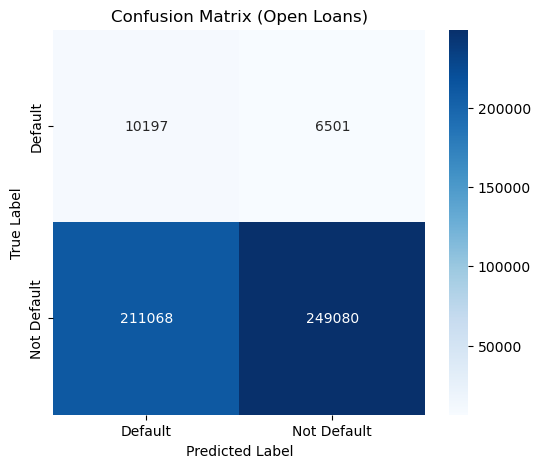

In [18]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for open loans
y_true = df_open_new["loan_default"]
y_pred = df_open_new["pred_default"]

cm = confusion_matrix(y_true, y_pred)
cm = cm[[1, 0], :][:, [1, 0]]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Default", "Not Default"],
            yticklabels=["Default", "Not Default"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Open Loans)")
plt.show()

Threshold Tuning, as open loans are more conservative, with predicted default is now 44% versus the actual defaults:

In [19]:
df_open_new["pred_default"].value_counts(normalize=True)

pred_default
0    0.535982
1    0.464018
Name: proportion, dtype: float64

In [20]:
# inspect df_open_new loan_default value counts
df_open_new["loan_default"].value_counts(normalize=True)

loan_default
0    0.964982
1    0.035018
Name: proportion, dtype: float64

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df_open_new["loan_default"], df_open_new["prob_default"])
optimal_idx = np.argmax(tpr - fpr)  # You can adjust this based on business needs
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold for Open Loans: {optimal_threshold:.2f}")
print(f"True Positive Rate: {tpr[optimal_idx]:.2f}")
print(f"False Positive Rate: {fpr[optimal_idx]:.2f}")

Optimal threshold for Open Loans: 0.47
True Positive Rate: 0.67
False Positive Rate: 0.51


In [22]:
# Apply the new threshold to classify defaults
df_open_new["pred_default"] = (df_open_new["prob_default"] >= optimal_threshold).astype(int)

# Inspect updated predictions
df_open_new.head()


,total_bc_limit,acc_open_past_24mths,avg_cur_bal,fico_range_high,tot_hi_cred_lim,int_rate,mort_acc,home_ownership,open_rv_24m,term,loan_amnt,mo_sin_old_rev_tl_op,grade,dti,bc_open_to_buy,loan_default,prob_default,pred_default
0,13800.0,4.0,14485.0,729.0,162033.0,0.0839,3.0,MORTGAGE,3.0,5.0,20225.0,130.0,B,24.52,6086.0,0,0.482064,1
1,48100.0,2.0,18924.0,699.0,190800.0,0.0999,4.0,MORTGAGE,NaN,5.0,17600.0,184.0,B,25.56,6178.0,0,0.422137,0
2,43700.0,4.0,3054.0,669.0,63728.0,0.1446,0.0,RENT,4.0,5.0,20000.0,215.0,C,18.64,9116.0,0,0.711542,1
3,0.0,2.0,52903.0,719.0,514188.0,0.1559,2.0,MORTGAGE,1.0,5.0,12000.0,190.0,C,24.93,NaN,0,0.637401,1
4,69200.0,3.0,13955.0,724.0,273689.0,0.1049,1.0,MORTGAGE,2.0,5.0,30000.0,292.0,B,22.80,33195.0,0,0.332221,0


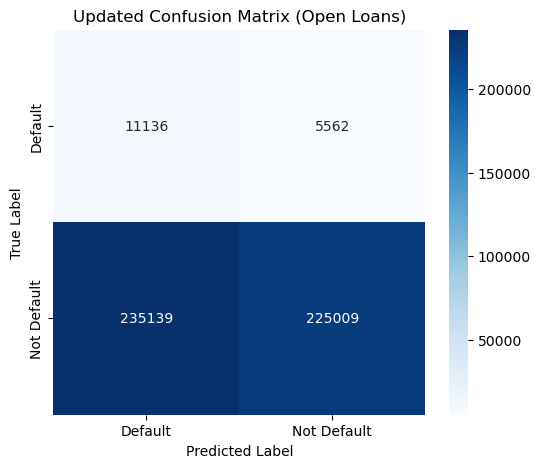

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the new confusion matrix
y_true = df_open_new["loan_default"]
y_pred = df_open_new["pred_default"]

cm = confusion_matrix(y_true, y_pred)
cm = cm[[1, 0], :][:, [1, 0]]  # Reorder for readability

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Default", "Not Default"],
            yticklabels=["Default", "Not Default"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Updated Confusion Matrix (Open Loans)")
plt.show()


Threshold Visualization for XGBoost before splitting into the 3 strategies:

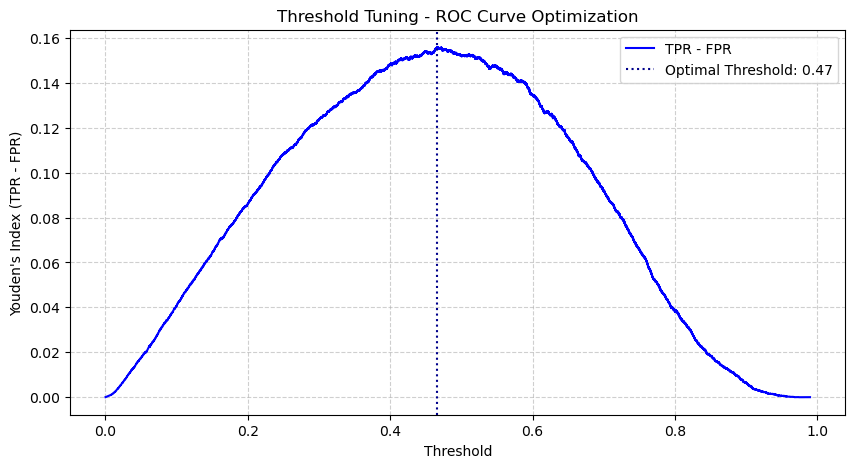

0.466241

In [24]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(df_open_new["loan_default"], df_open_new["prob_default"])

# Compute TPR - FPR (Youden's Index)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

# Plot TPR - FPR vs. Threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, youden_index, label="TPR - FPR", color="blue")
plt.axvline(x=optimal_threshold, color="darkblue", linestyle="dotted", label=f"Optimal Threshold: {optimal_threshold:.2f}")

plt.xlabel("Threshold")
plt.ylabel("Youden's Index (TPR - FPR)")
plt.title("Threshold Tuning - ROC Curve Optimization")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Output optimal threshold
optimal_threshold

#### Computing Business Impact for Open Loans (Without Separating Grades)

Function to compute business impact for any strategy:

In [25]:
def compute_actual_business_impact(df):
    """
    Computes actual financial impact:
    - TP: Correctly predicted bad loans (not considered in return)
    - FP (Missed opportunity): Interest lost from good loans wrongly classified as default. We use ('loan_amnt' x 'int_rate' x 'term') as the missed interest.
    - FN (Default risk): Money lost from bad loans wrongly classified as good: We use 'loan_amnt' as the principal amount.
    - TN (Interest earnings): Interest earned from correctly classified good loans. We use ('loan_amnt' x 'int_rate' x 'term') as the total earnings.
    - Risk-Adjusted Return: Interest earned minus default losses.
    """
    df_temp = df.copy() # Create a copy of the dataframe

    # False Positives (FP) → Loan was actually good but model predicted default
    fp_loans = df_temp[(df_temp["pred_default"] == 1) & (df_temp["loan_default"] == 0)]
    missed_earnings = (fp_loans["loan_amnt"] * fp_loans["int_rate"] * fp_loans["term"]) # Missed interest
    missed_interest = missed_earnings.sum()

    # False Negatives (FN) → Loan was actually bad but model predicted good
    fn_loans = df_temp[(df_temp["pred_default"] == 0) & (df_temp["loan_default"] == 1)]
    default_loss = fn_loans["loan_amnt"].sum() # Principal lost

    # True Positives (TP) → Correctly predicted bad loans (not considered in return)
    
    # True Negatives (TN) → Correctly predicted good loans -- Interest earned
    tn_loans = df_temp[(df_temp["pred_default"] == 0) & (df_temp["loan_default"] == 0)]
    gained_earnings = (tn_loans["loan_amnt"] * tn_loans["int_rate"] * tn_loans["term"])# Total interest earned
    expected_interest = gained_earnings.sum()

    # Risk-Adjusted Return (RAR)
    risk_adjusted_return = missed_interest - default_loss

    return {
        "Missed Revenue (FP)": missed_interest,
        "Default Loss (FN)": default_loss,
        "Expected Interest Earned (TN)": expected_interest,
        "Risk-Adjusted Return (RAR)": risk_adjusted_return
    }



Computing Business Impact without Splitting into grades:

In [26]:
# Compute impact
actual_impact = compute_actual_business_impact(df_open_new)

# Display results for Business impact:
df_actual_impact = pd.DataFrame(actual_impact, index = [0])
df_actual_impact

,Missed Revenue (FP),Default Loss (FN),Expected Interest Earned (TN),Risk-Adjusted Return (RAR)
0,2.926920e+09,87449300.0,1.274154e+09,2.839471e+09


## 4.3 Computing Thresholds for 3 Strategies and Business Impact:

1. Define the strategy dictionary
2. Get 3 different confusion matrices
3. Threshold Tune for Optimal threshold and Visualization
4. Compute 3 different business impact and compare

In [27]:
strategy_dict = {
    "Conservative": ["A", "B"],
    "Balanced": ["B", "C", "D"],
    "Aggressive": ["D", "E", "F"]
}

In [28]:
# Function to compute and plot confusion matrix for a given strategy
def plot_confusion_matrix_for_strategy(strategy_name, loan_grades):
    # Filter dataset based on selected grades
    df_filtered = df_open_new[df_open_new["grade"].isin(loan_grades)]
    
    # Get true labels and predictions
    y_true = df_filtered["loan_default"]
    y_pred = df_filtered["pred_default"]
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = cm[[1, 0], :][:, [1, 0]]  # Reorder for clarity

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Default", "Not Default"],
                yticklabels=["Default", "Not Default"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {strategy_name} Strategy")
    plt.show()

    return cm

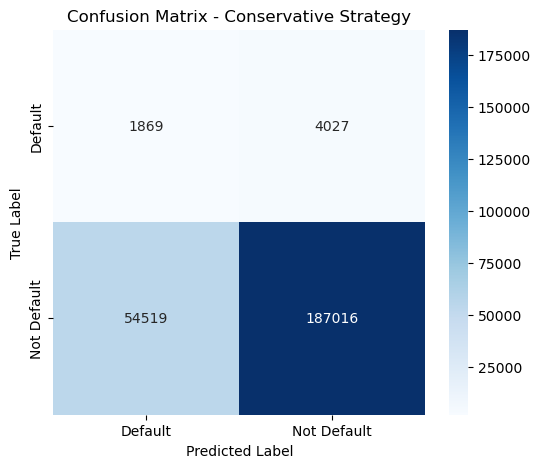

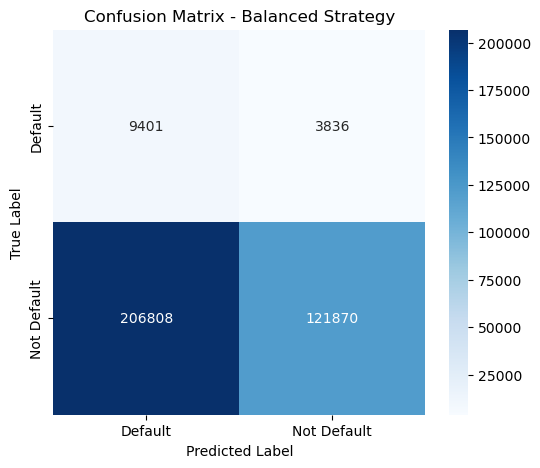

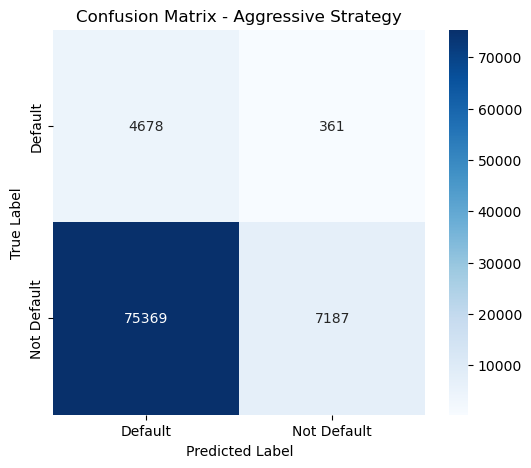

In [29]:
# Loop through each strategy and generate confusion matrix
for strategy, grades in strategy_dict.items():
    plot_confusion_matrix_for_strategy(strategy, grades)

In [30]:
# Function to compute and plot optimal thresholds for each strategy
def compute_optimal_thresholds(strategy_dict, df_open_new):
    optimal_thresholds = {}

    plt.figure(figsize=(10, 6))  # Set up the plot for all strategies

    for strategy_name, loan_grades in strategy_dict.items():
        # Filter dataset based on selected grades
        df_filtered = df_open_new[df_open_new["grade"].isin(loan_grades)]
        
        # Compute ROC curve values
        fpr, tpr, thresholds = roc_curve(df_filtered["loan_default"], df_filtered["prob_default"])

        # Compute Youden's Index (TPR - FPR) for threshold optimization
        youden_index = tpr - fpr
        optimal_idx = np.argmax(youden_index)
        optimal_threshold = thresholds[optimal_idx]

        # Store optimal threshold for the strategy
        optimal_thresholds[strategy_name] = optimal_threshold

        # Plot TPR - FPR curve
        plt.plot(thresholds, youden_index, label=f"{strategy_name} (Optimal: {optimal_threshold:.2f})")

        # Mark optimal threshold
        plt.axvline(x=optimal_threshold, linestyle="dotted")

    # Finalize plot
    plt.xlabel("Threshold")
    plt.ylabel("Youden's Index (TPR - FPR)")
    plt.title("Threshold Tuning - ROC Curve Optimization for Investment Strategies")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    return optimal_thresholds

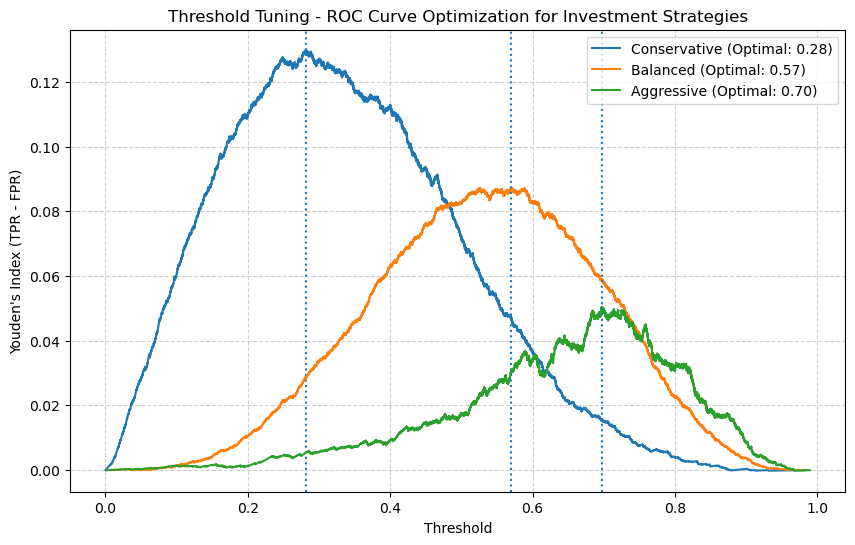

{'Conservative': 0.28122437, 'Balanced': 0.56977344, 'Aggressive': 0.6977857}

In [31]:
# Compute and visualize optimal thresholds for each strategy
best_thresholds_strategies = compute_optimal_thresholds(strategy_dict, df_open_new)
best_thresholds_strategies

Compute the 3 different strategies' business impact

In [32]:
# Function to compute business impact for each strategy at its optimal threshold
def compute_strategy_business_impact(strategy_dict, best_thresholds, df_open_new):
    strategy_impact = {}

    for strategy_name, loan_grades in strategy_dict.items():
        # Filter dataset based on selected grades
        df_filtered = df_open_new[df_open_new["grade"].isin(loan_grades)]
        
        # Apply the optimal threshold for the strategy
        optimal_threshold = best_thresholds[strategy_name]
        df_filtered.loc[:, "pred_default"] = (df_filtered["prob_default"] >= optimal_threshold).astype(int)

        # Compute business impact
        impact = compute_actual_business_impact(df_filtered)
        strategy_impact[strategy_name] = impact

    return strategy_impact


In [33]:
# Compute business impact for each strategy
strategy_business_impact = compute_strategy_business_impact(strategy_dict, best_thresholds_strategies, df_open_new)

df_strategy_impact = pd.DataFrame(strategy_business_impact).T  # Convert to DataFrame for readability
df_strategy_impact

,Missed Revenue (FP),Default Loss (FN),Expected Interest Earned (TN),Risk-Adjusted Return (RAR)
Conservative,9.653107e+08,28168475.0,4.346826e+08,9.371423e+08
Balanced,1.770869e+09,105799775.0,1.523239e+09,1.665070e+09
Aggressive,7.301840e+08,39830225.0,5.722674e+08,6.903538e+08


In [34]:
# determine the best strategy based on the highest risk-adjusted return
best_strategy = df_strategy_impact["Risk-Adjusted Return (RAR)"].idxmax()
best_strategy

'Balanced'

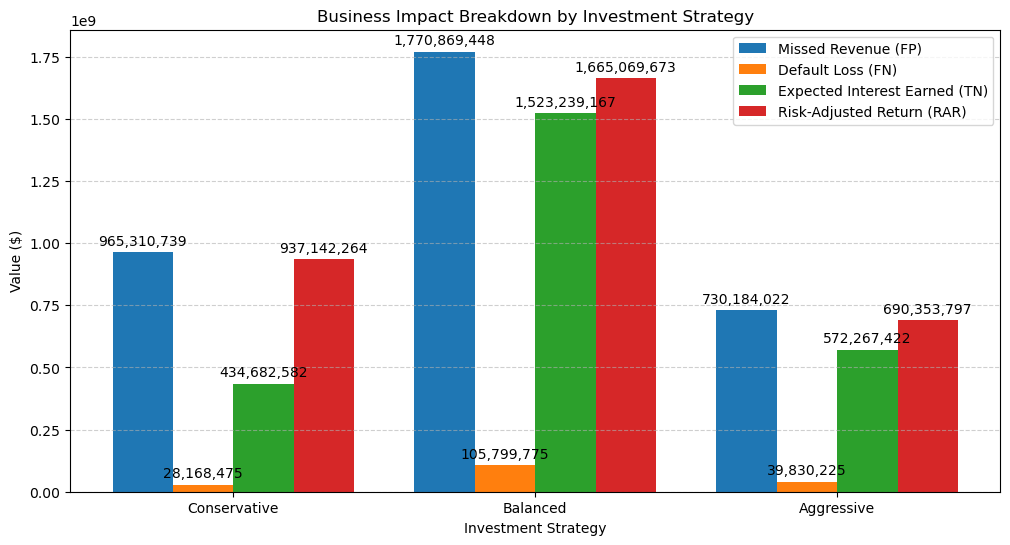

In [35]:


# Function to visualize business impact components
def plot_business_impact(strategy_impact):
    categories = list(strategy_impact.keys())
    metrics = ["Missed Revenue (FP)", "Default Loss (FN)", "Expected Interest Earned (TN)", "Risk-Adjusted Return (RAR)"]

    # Extract values for each metric
    values = {metric: [strategy_impact[strategy][metric] for strategy in categories] for metric in metrics}

    # Set up bar width and positions
    x = np.arange(len(categories))
    width = 0.2  

    # Create bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - 1.5 * width, values["Missed Revenue (FP)"], width, label="Missed Revenue (FP)")
    bars2 = ax.bar(x - 0.5 * width, values["Default Loss (FN)"], width, label="Default Loss (FN)")
    bars3 = ax.bar(x + 0.5 * width, values["Expected Interest Earned (TN)"], width, label="Expected Interest Earned (TN)")
    bars4 = ax.bar(x + 1.5 * width, values["Risk-Adjusted Return (RAR)"], width, label="Risk-Adjusted Return (RAR)")

    # Annotate bar values
    for bars in [bars1, bars2, bars3, bars4]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:,.0f}', 
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha='center', fontsize=10)

    # Labels and formatting
    ax.set_xlabel("Investment Strategy")
    ax.set_ylabel("Value ($)")
    ax.set_title("Business Impact Breakdown by Investment Strategy")
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    ax.grid(axis='y', linestyle="--", alpha=0.6)

    plt.show()

# Run the visualization
plot_business_impact(strategy_business_impact)


### 4.4 Conclusion

By applying our model from closed loans, we estimated business impact metrics, revealing:
1. Missed revenue of $2.92B due to rejected profitable loans
2. Default loss of $87.4M
3. Expected interest earned of $1.27B
4. This leads to risk-adjusted return (RAR) of $2.83B.

Investment Strategies and Risk-Return Insights
After segmenting loans into Conservative, Balanced, and Aggressive strategies, we found:

1. Conservative (Grades A & B): Had the lowest default loss ($28.1M) but limited RAR ($0.93B).
2. Balanced (Grades B, C, & D): Optimized both risk and return, achieving the highest RAR of $1.67B.
3. Aggressive (Grades D, E, & F): Maximized interest earned but suffered a high default loss ($39.8M), reducing RAR to $0.69B.

Key Takeaways:

1. Threshold Optimization: Tuning the decision threshold to 0.47 maximized risk-adjusted return, balancing missed revenue and defaults.
2. Optimal Strategy: Balanced (if only 1 choice) With the highest RAR, it offers the best risk-return tradeoff.
3. Dynamic Adjustments: Future refinements in threshold tuning can further optimize profitability based on economic conditions.